In [ ]:
!pip install -q -U "tensorflow-text==2.13.*"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.7/479.7 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 65.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 58.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 17.2 MB/s eta 0:00:00


In [ ]:
!pip install "tf-models-official==2.13.*"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.2/241.2 kB 20.8 MB/s eta 0:00:00
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16161 sha256=dc4a61c24fadc48feb0d52edde2e6e269ce6a7451c7f1a08f49e4b9e811e7951
  Stored in directory: /root/.cache/pip/wheels/1a/67/4a/ad4082dd7dfc30f2abfe4d80a2ed5926a506eb8a972b4767fa
Successfully built seqeval


In [ ]:
!git clone https://github.com/tensorflow/models.git

import os
os.environ['PYTHONPATH'] += ":/content/models"

import sys
sys.path.append("/content/models")

Cloning into 'models'...
remote: Enumerating objects: 89611, done.
remote: Counting objects: 100% (3319/3319), done.
remote: Compressing objects: 100% (1966/1966), done.
remote: Total 89611 (delta 1601), reused 2407 (delta 1324), pack-reused 86292
Receiving objects: 100% (89611/89611), 605.34 MiB | 20.45 MiB/s, done.
Resolving deltas: 100% (63512/63512), done.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization
import matplotlib.pyplot as plt
tf.get_logger().setLevel("ERROR")

In [ ]:
from keras.utils import to_categorical

# Data Preprocessing

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/ecommerce.csv")

In [ ]:
#data["Sentiment"] = data["Sentiment"].map({"Satisfied":0 , "Neutral":1 ,"Unsatisfied":2})

In [ ]:
#data[["Review_Text","Sentiment"]].to_csv("/content/drive/MyDrive/disney/data_new.csv",index= False)

In [ ]:
#data2 = pd.read_csv("/content/drive/MyDrive/disney/data_new.csv")

In [ ]:
data

,Review Text,Rating
0,I had such high hopes for this dress and reall...,3
1,"I love, love, love this jumpsuit. it's fun, fl...",5
2,This shirt is very flattering to all due to th...,5
3,"I love tracy reese dresses, but this one is no...",2
4,I aded this in my basket at hte last mintue to...,5
...,...,...
7995,"I expected better from this top, it is thin, w...",3
7996,Love love the print on these but the fit is of...,4
7997,I ordered this tunic in xl and it fits me true...,5
7998,Wasn't sure whether i would like the top from ...,4


In [ ]:
#Emotions dictionary
review_map = {1:0,2:0,3:1,4:2,5:2}
data['review']=data['Rating'].map(review_map)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(data["Review Text"],data["review"],test_size = 0.2 ,stratify = data["review"])

In [ ]:
y_train.unique()

array([2, 1, 0])

In [ ]:
#TRAIN = pd.DataFrame({"Review_Text":X_train,"Sentiment":y_train})
#TEST = pd.DataFrame({"Review_Text":X_test,"Sentiment":y_test})
#TRAIN.to_csv('/content/drive/MyDrive/disney/dataset/train.csv',index=False)
#TEST.to_csv("/content/drive/MyDrive/disney/dataset/test.csv",index = False)

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
batch_size = 32
seed = 42

In [ ]:
#batch_size = 64
#dataset = tf.data.experimental.make_csv_dataset("/content/drive/MyDrive/disney/dataset/train.csv",
#                                      batch_size=batch_size,
#                                      label_name = "Sentiment",select_columns=['Review_Text', 'Sentiment'])

In [ ]:
#DATASET_SIZE =pd.read_csv("/content/drive/MyDrive/disney/dataset/train.csv").shape[0]

In [ ]:
disney = data.drop("Rating",axis=1)
label = disney.pop("review")
label = to_categorical(label)

In [ ]:
disney

,Review Text
0,I had such high hopes for this dress and reall...
1,"I love, love, love this jumpsuit. it's fun, fl..."
2,This shirt is very flattering to all due to th...
3,"I love tracy reese dresses, but this one is no..."
4,I aded this in my basket at hte last mintue to...
...,...
7995,"I expected better from this top, it is thin, w..."
7996,Love love the print on these but the fit is of...
7997,I ordered this tunic in xl and it fits me true...
7998,Wasn't sure whether i would like the top from ...


In [ ]:
input = disney.values.ravel()
data_slices =  tf.data.Dataset.from_tensor_slices((input,label))
dataset = data_slices.batch(64)

In [ ]:
#test_data = pd.read_csv("/content/drive/MyDrive/disney/dataset/test.csv")
#label_test = test_data.pop("Sentiment")
#label_test = to_categorical(label_test)
#test_data_sliced = tf.data.Dataset.from_tensor_slices((test_data.values.ravel(),label_test))
#test_dataset = test_data_sliced.batch(64)
#test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [ ]:
DATASET_SIZE = len(input)

In [ ]:
train_size = int(0.9*len(input))
val_size = int(0.1*len(input))

In [ ]:
raw_data_train = dataset.take(train_size)
raw_data_val = dataset.skip(train_size)

In [ ]:
data_train = raw_data_train.cache().prefetch(buffer_size=AUTOTUNE)
data_val = raw_data_val.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

In [ ]:
#@title Choose a BERT model to fine-tune

bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8'  #@param ["bert_en_uncased_L-12_H-768_A-12", "bert_en_cased_L-12_H-768_A-12", "bert_multi_cased_L-12_H-768_A-12", "small_bert/bert_en_uncased_L-2_H-128_A-2", "small_bert/bert_en_uncased_L-2_H-256_A-4", "small_bert/bert_en_uncased_L-2_H-512_A-8", "small_bert/bert_en_uncased_L-2_H-768_A-12", "small_bert/bert_en_uncased_L-4_H-128_A-2", "small_bert/bert_en_uncased_L-4_H-256_A-4", "small_bert/bert_en_uncased_L-4_H-512_A-8", "small_bert/bert_en_uncased_L-4_H-768_A-12", "small_bert/bert_en_uncased_L-6_H-128_A-2", "small_bert/bert_en_uncased_L-6_H-256_A-4", "small_bert/bert_en_uncased_L-6_H-512_A-8", "small_bert/bert_en_uncased_L-6_H-768_A-12", "small_bert/bert_en_uncased_L-8_H-128_A-2", "small_bert/bert_en_uncased_L-8_H-256_A-4", "small_bert/bert_en_uncased_L-8_H-512_A-8", "small_bert/bert_en_uncased_L-8_H-768_A-12", "small_bert/bert_en_uncased_L-10_H-128_A-2", "small_bert/bert_en_uncased_L-10_H-256_A-4", "small_bert/bert_en_uncased_L-10_H-512_A-8", "small_bert/bert_en_uncased_L-10_H-768_A-12", "small_bert/bert_en_uncased_L-12_H-128_A-2", "small_bert/bert_en_uncased_L-12_H-256_A-4", "small_bert/bert_en_uncased_L-12_H-512_A-8", "small_bert/bert_en_uncased_L-12_H-768_A-12", "albert_en_base", "electra_small", "electra_base", "experts_pubmed", "experts_wiki_books", "talking-heads_base"]

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [ ]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

In [ ]:
text_test = ['London bridge is falling down']
text_preprocessed = bert_preprocess_model(text_test)

print(f'Keys       : {list(text_preprocessed.keys())}')
print(f'Shape      : {text_preprocessed["input_word_ids"].shape}')
print(f'Word Ids   : {text_preprocessed["input_word_ids"][0, :12]}')
print(f'Input Mask : {text_preprocessed["input_mask"][0, :12]}')
print(f'Type Ids   : {text_preprocessed["input_type_ids"][0, :12]}')

Keys       : ['input_word_ids', 'input_mask', 'input_type_ids']
Shape      : (1, 128)
Word Ids   : [ 101 2414 2958 2003 4634 2091  102    0    0    0    0    0]
Input Mask : [1 1 1 1 1 1 1 0 0 0 0 0]
Type Ids   : [0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

# Building Model

In [ ]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape = (),dtype = tf.string , name = "text")
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name = "preprocessing")
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder , trainable=True,name = "bertmodel")
  outputs = encoder(encoder_inputs)
  net = outputs["pooled_output"]
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(3, activation=None, name='classifier')(net)
  return tf.keras.Model(text_input,net)

In [ ]:
classifier_model = build_classifier_model()

In [ ]:
text_test = ['London bridge is falling down']
bert_check = classifier_model(tf.constant(['London bridge is falling down']))

In [ ]:
bert_check

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[ 1.2021192 , -2.686584  , -0.38521016]], dtype=float32)>

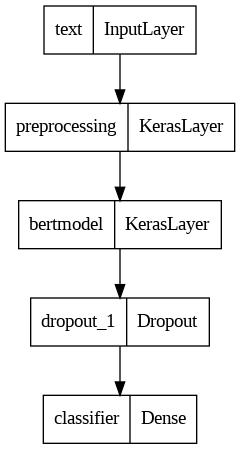

In [ ]:
tf.keras.utils.plot_model(classifier_model)

In [ ]:
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
metrics = tf.metrics.CategoricalAccuracy()

In [ ]:
epochs = 10
steps_per_epoch =   tf.data.experimental.cardinality(data_train).numpy()
num_train_steps = epochs*steps_per_epoch
num_warmup_steps = int(0.1*num_train_steps)
print("Steps per epochs ", int(steps_per_epoch))
print("num_train_steps ", int(num_train_steps))

Steps per epochs  125
num_train_steps  1250


In [ ]:
init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [ ]:
classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

In [ ]:
print(f'Training model with {tfhub_handle_encoder}')
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath="checkpoint/",
    save_weights_only=True,
    monitor='loss',
    mode='max',
    save_best_only=True)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
history = classifier_model.fit(x=data_train,
                               validation_data=data_val,
                               callbacks=[callback,model_checkpoint_callback],
                               epochs=epochs)

Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Epoch 1/10
125/125 [==============================] - 74s 516ms/step - loss: 0.6939 - categorical_accuracy: 0.7197
Epoch 2/10
125/125 [==============================] - 63s 502ms/step - loss: 0.4729 - categorical_accuracy: 0.8023
Epoch 3/10
125/125 [==============================] - 63s 500ms/step - loss: 0.3854 - categorical_accuracy: 0.8395
Epoch 4/10
125/125 [==============================] - 69s 551ms/step - loss: 0.3380 - categorical_accuracy: 0.8614
Epoch 5/10
125/125 [==============================] - 70s 560ms/step - loss: 0.2990 - categorical_accuracy: 0.8744
Epoch 6/10
125/125 [==============================] - 67s 536ms/step - loss: 0.2677 - categorical_accuracy: 0.8914
Epoch 7/10
125/125 [==============================] - 69s 554ms/step - loss: 0.2371 - categorical_accuracy: 0.9014
Epoch 8/10
125/125 [==============================] - 69s 552ms/step - loss: 0.2104 - categorical_accur

In [ ]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'categorical_accuracy'])


# Accuracy and Model Evaluation

In [ ]:
saved_model_path = '/content/drive/MyDrive/senti/senti_bert'.format("test/".replace('/', '_'))

classifier_model.save(saved_model_path, include_optimizer=False)

In [ ]:
model = tf.saved_model.load('/content/drive/MyDrive/senti/senti_bert')

In [ ]:
model(tf.constant(["For the price, this top holds up. the colors make this top more interesting, but the white is rather plain and sheer. i tried on my usual size small and it fit well"])).numpy()

array([[-2.944061  , -0.19974764,  4.7597485 ]], dtype=float32)

# Prediction for Manual Input


In [ ]:
def predict_Sentiment(text):
  t = tf.constant(text)
  for sent , res in zip(text,model(t).numpy()):
    pred = res
    dics = {0:"Negative",1:"Neutral",2:"Positive"}
    pred = np.where(pred == max(pred))
    print("Review: ", sent)
    print("Sentiment: ","\033[1m"+dics[pred[0][0]])

In [ ]:
predict_Sentiment(["For the price, this top holds up. the colors make this top more interesting, but the white is rather plain and sheer. i tried on my usual size small and it fit well"])

Review:  For the price, this top holds up. the colors make this top more interesting, but the white is rather plain and sheer. i tried on my usual size small and it fit well
Sentiment:  Positive
